In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
data=pd.read_csv("placementdata.csv")

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.shape

(10000, 12)

In [ ]:
data.isnull().sum()

,0
StudentID,0
CGPA,0
Internships,0
Projects,0
Workshops/Certifications,0
AptitudeTestScore,0
SoftSkillsRating,0
ExtracurricularActivities,0
PlacementTraining,0
SSC_Marks,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [ ]:
data.describe()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,69.159400,74.501500
std,2886.89568,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,10.430459,8.919527
min,1.00000,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000
25%,2500.75000,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000
50%,5000.50000,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000
75%,7500.25000,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000
max,10000.00000,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000


In [ ]:
data.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


<Axes: xlabel='PlacementStatus'>

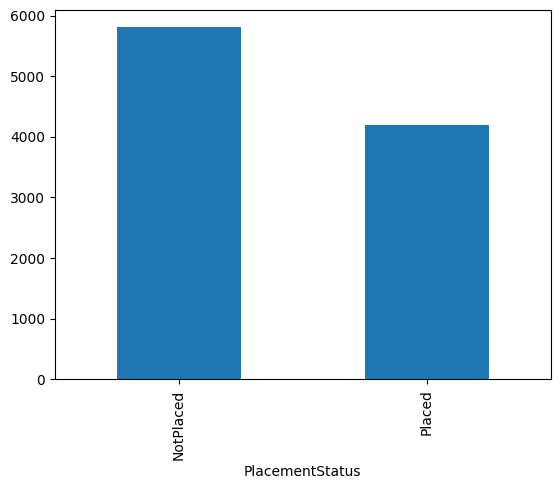

In [ ]:
data['PlacementStatus'].value_counts().plot(kind='bar')

In [ ]:
data['PlacementStatus'].value_counts()/len(data)*100

,count
PlacementStatus,
NotPlaced,58.03
Placed,41.97


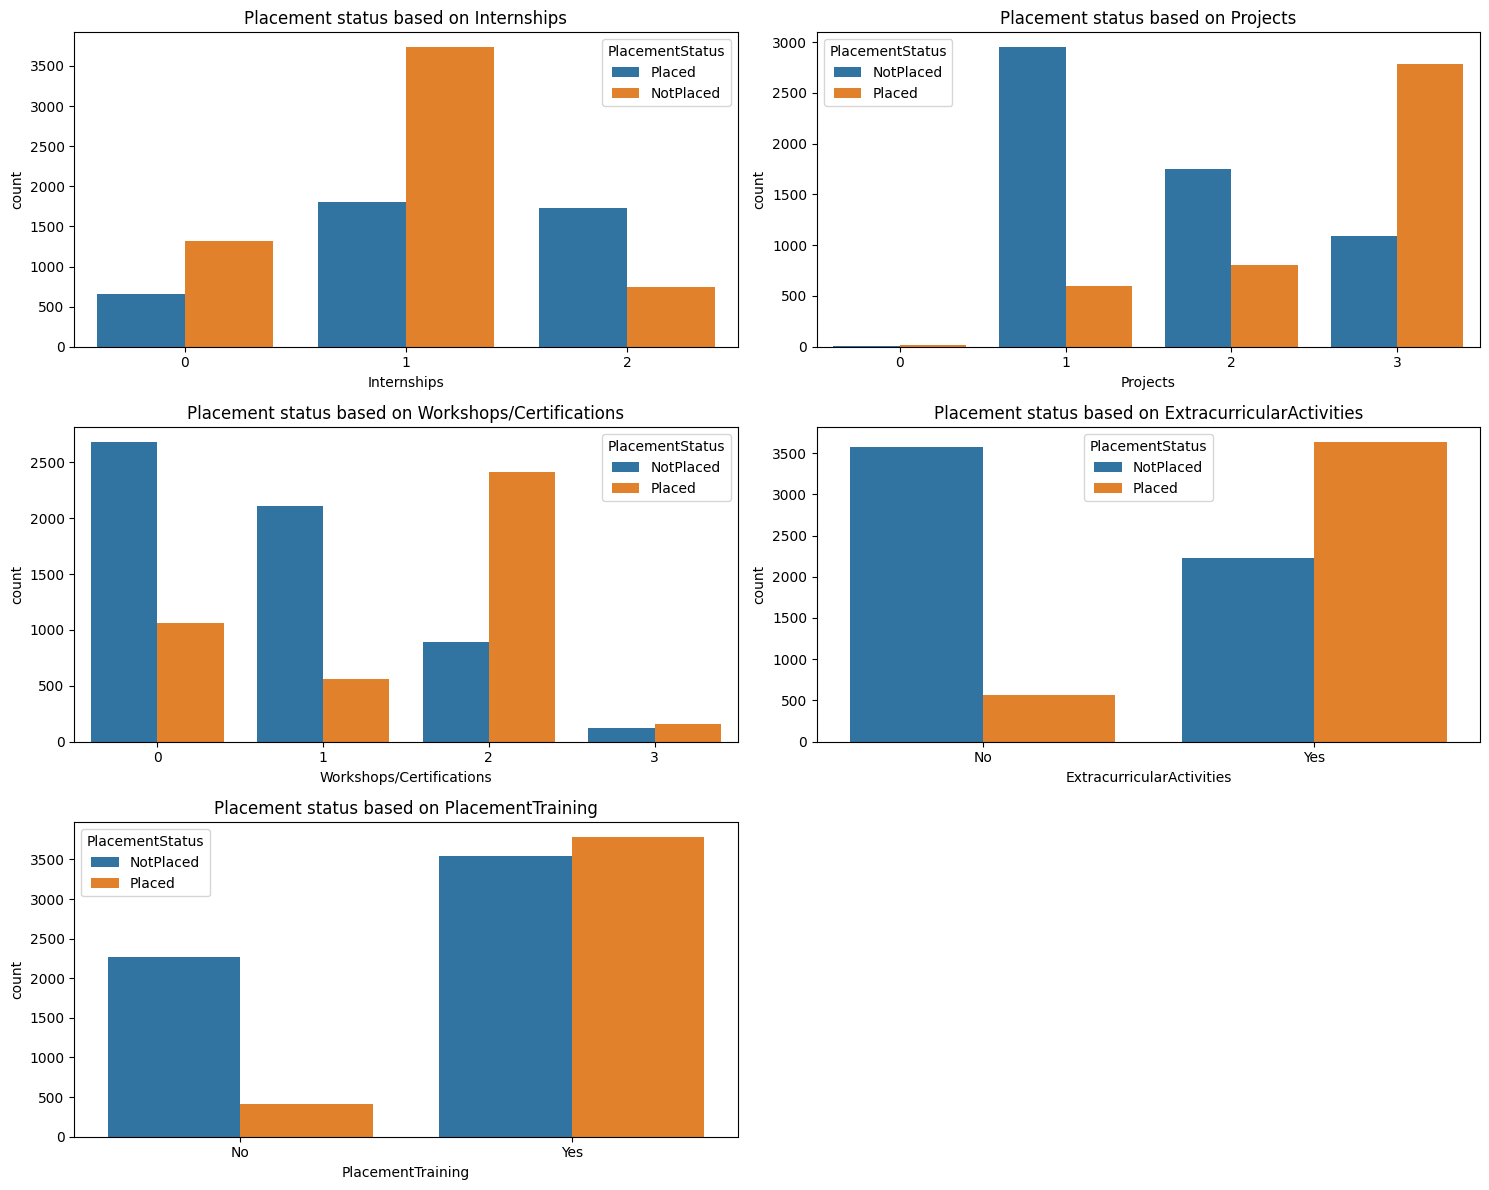

In [ ]:
placement_plot=['Internships','Projects','Workshops/Certifications',"ExtracurricularActivities","PlacementTraining"]
plt.figure(figsize=(15,12))

for i,graph in enumerate(placement_plot):
  plt.subplot(3,2,i+1)
  sns.countplot(x=graph,data=data,hue="PlacementStatus")
  plt.title(f"Placement status based on {graph}")

plt.tight_layout()

In [ ]:
num_col=data.select_dtypes('number')
num_col
print('Numerical columns',num_col.columns.tolist())

Numerical columns ['StudentID', 'CGPA', 'Internships', 'Projects', 'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating', 'SSC_Marks', 'HSC_Marks']


In [ ]:
non_num_col=data.select_dtypes('object')
# num_col
print('Numerical columns',non_num_col.columns.tolist())

Numerical columns ['ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus']


In [ ]:
data['PlacementStatus'].replace({"Placed":1,"NotPlaced":0},inplace=True)

In [ ]:
data['PlacementStatus'].head()

,PlacementStatus
0,0
1,1
2,0
3,1
4,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data["ExtracurricularActivities"]=le.fit_transform(data['ExtracurricularActivities'])
data["PlacementTraining"]=le.fit_transform(data['PlacementTraining'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  int64  
 8   PlacementTraining          10000 non-null  int64  
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 937.6 KB


In [ ]:
x=data.drop(['PlacementStatus','StudentID'],axis=1)
y=data['PlacementStatus']

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [ ]:
model=DecisionTreeClassifier()

In [ ]:
model.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

[Text(0.48044565230367275, 0.9814814814814815, 'HSC_Marks <= 0.115\ngini = 0.487\nsamples = 7500\nvalue = [4345, 3155]\nclass = Placed'),
 Text(0.2499593898370989, 0.9444444444444444, 'ExtracurricularActivities <= -0.173\ngini = 0.308\nsamples = 4142\nvalue = [3353, 789]\nclass = Placed'),
 Text(0.3652025210703858, 0.962962962962963, 'True  '),
 Text(0.1231635679300371, 0.9074074074074074, 'AptitudeTestScore <= -0.723\ngini = 0.184\nsamples = 2710\nvalue = [2432, 278]\nclass = Placed'),
 Text(0.03858600742196027, 0.8703703703703703, 'PlacementTraining <= -0.527\ngini = 0.095\nsamples = 1284\nvalue = [1220, 64]\nclass = Placed'),
 Text(0.01405806592447064, 0.8333333333333334, 'HSC_Marks <= -0.781\ngini = 0.039\nsamples = 701\nvalue = [687, 14]\nclass = Placed'),
 Text(0.005588299497926217, 0.7962962962962963, 'SSC_Marks <= 0.125\ngini = 0.018\nsamples = 435\nvalue = [431, 4]\nclass = Placed'),
 Text(0.0020956123117223313, 0.7592592592592593, 'AptitudeTestScore <= -1.09\ngini = 0.01\nsam

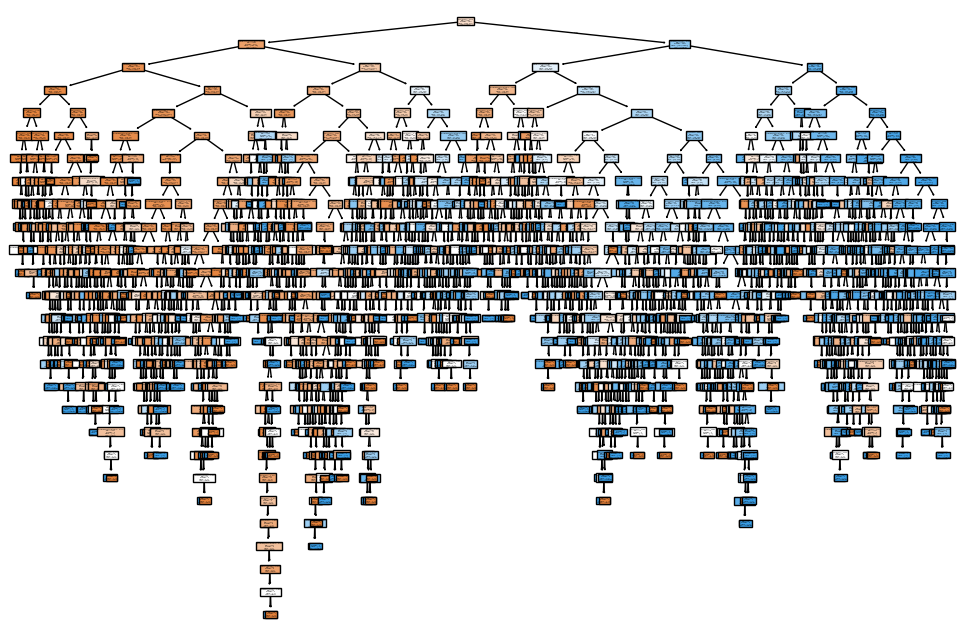

In [ ]:
plt.figure(figsize=(12,8))
plot_tree(model,filled=True,feature_names=x.columns,class_names=['Placed','NotPlaced'])

In [ ]:
plt.show()

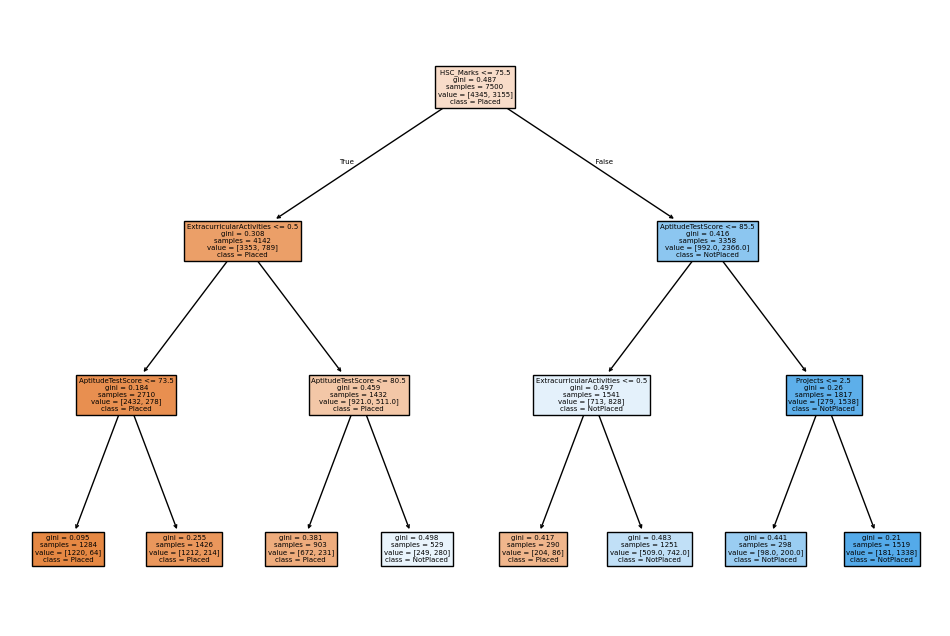

In [ ]:
 clf=DecisionTreeClassifier(max_depth=3,min_samples_leaf=5,min_samples_split=10)
clf.fit(x_train,y_train)
plt.figure(figsize=(12,8))
plot_tree(clf,filled=True,feature_names=x.columns,class_names=['Placed','NotPlaced'])
plt.show()

In [ ]:
y_pred_model=model.predict(x_test_scaled)
y_ped_clf=clf.predict(x_test_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import classification_report


In [ ]:
print(classification_report(y_test,y_pred_model))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      1458
           1       0.66      0.66      0.66      1042

    accuracy                           0.72      2500
   macro avg       0.71      0.71      0.71      2500
weighted avg       0.72      0.72      0.72      2500



In [ ]:
print(classification_report(y_test,y_ped_clf))

              precision    recall  f1-score   support

           0       0.58      1.00      0.74      1458
           1       0.00      0.00      0.00      1042

    accuracy                           0.58      2500
   macro avg       0.29      0.50      0.37      2500
weighted avg       0.34      0.58      0.43      2500



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
importances=model.feature_importances_

In [ ]:
feature_importance=pd.DataFrame({'feature':x_train.columns,'importance':importances})

In [ ]:
feature_importance.sort_values(by='importance',ascending=False,inplace=True)

In [ ]:
feature_importance

,feature,importance
9,HSC_Marks,0.363491
4,AptitudeTestScore,0.146239
8,SSC_Marks,0.119099
0,CGPA,0.104992
5,SoftSkillsRating,0.092154
6,ExtracurricularActivities,0.047554
3,Workshops/Certifications,0.044667
1,Internships,0.033445
2,Projects,0.029693
7,PlacementTraining,0.018667


In [ ]:
x=data[['HSC_Marks','AptitudeTestScore','SSC_Marks','CGPA']]
y=data['PlacementStatus']

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [ ]:
model=DecisionTreeClassifier()

In [ ]:
model.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

[Text(0.5122420284726205, 0.9821428571428571, 'HSC_Marks <= 0.115\ngini = 0.487\nsamples = 7500\nvalue = [4345, 3155]\nclass = Placed'),
 Text(0.288899619296583, 0.9464285714285714, 'SSC_Marks <= -0.163\ngini = 0.308\nsamples = 4142\nvalue = [3353, 789]\nclass = Placed'),
 Text(0.40057082388460175, 0.9642857142857142, 'True  '),
 Text(0.1696029243119266, 0.9107142857142857, 'AptitudeTestScore <= 0.01\ngini = 0.211\nsamples = 2784\nvalue = [2451, 333]\nclass = Placed'),
 Text(0.09152013251783894, 0.875, 'AptitudeTestScore <= -0.845\ngini = 0.162\nsamples = 2173\nvalue = [1980, 193]\nclass = Placed'),
 Text(0.04675076452599388, 0.8392857142857143, 'CGPA <= 1.883\ngini = 0.11\nsamples = 1249\nvalue = [1176, 73]\nclass = Placed'),
 Text(0.04620710159700985, 0.8035714285714286, 'HSC_Marks <= -0.557\ngini = 0.109\nsamples = 1248\nvalue = [1176, 72]\nclass = Placed'),
 Text(0.028890587835541964, 0.7678571428571429, 'CGPA <= -0.072\ngini = 0.084\nsamples = 934\nvalue = [893, 41]\nclass = Place

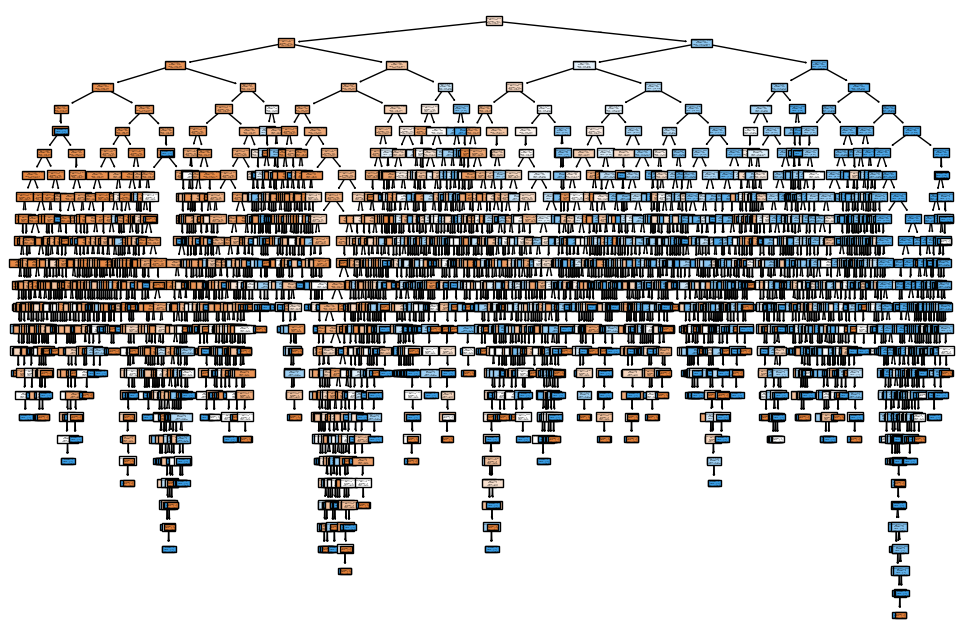

In [ ]:
plt.figure(figsize=(12,8))
plot_tree(model,filled=True,feature_names=x.columns,class_names=['Placed','NotPlaced'])

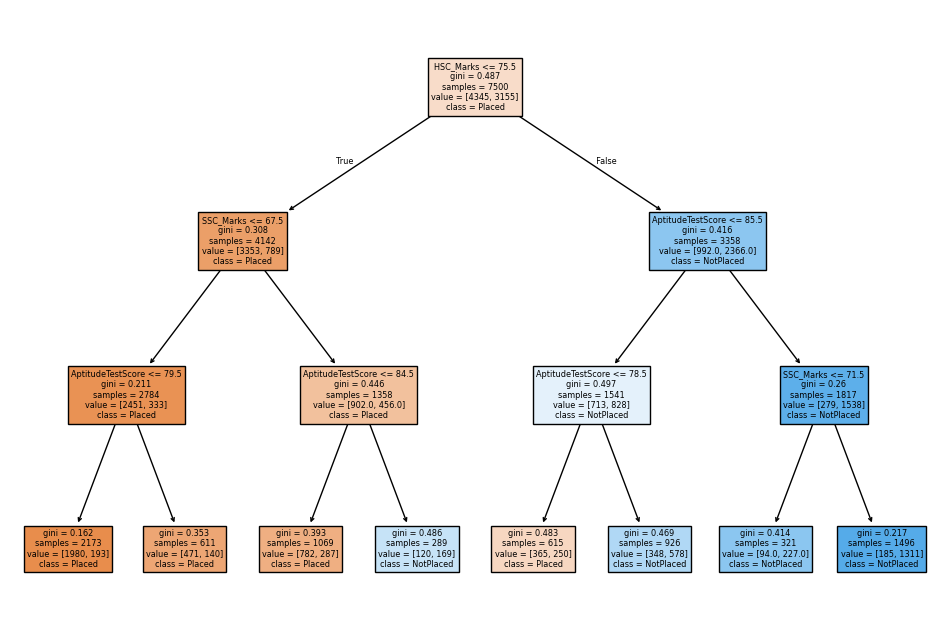

In [ ]:
 clf=DecisionTreeClassifier(max_depth=3,min_samples_leaf=5,min_samples_split=10)
clf.fit(x_train,y_train)
plt.figure(figsize=(12,8))
plot_tree(clf,filled=True,feature_names=x.columns,class_names=['Placed','NotPlaced'])
plt.show()

In [ ]:
y_pred_model=model.predict(x_test_scaled)
y_ped_clf=clf.predict(x_test_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print(classification_report(y_test,y_pred_model))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73      1458
           1       0.62      0.63      0.62      1042

    accuracy                           0.68      2500
   macro avg       0.67      0.67      0.67      2500
weighted avg       0.68      0.68      0.68      2500



In [ ]:
print(classification_report(y_test,y_ped_clf))

              precision    recall  f1-score   support

           0       0.58      1.00      0.74      1458
           1       0.00      0.00      0.00      1042

    accuracy                           0.58      2500
   macro avg       0.29      0.50      0.37      2500
weighted avg       0.34      0.58      0.43      2500



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
